<a href="https://colab.research.google.com/github/anamulislam0805/Defense/blob/main/Title_Automated_insomnia_detection_using_machine_learning_and_ensemble_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

In [180]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [181]:
df=pd.read_csv('/content/drive/MyDrive/Insomnia Paper/Insomnia Survey Data EE.csv')

In [182]:
df

,Timestamp,age,gender,sleep_after_light,awakenings,awakening_earlier,sleep_duration,sleep_quality,wellbeing_day,day_activity,...,smoke,alcohol,tea_coffee,physical_activity_level,extracurricular_activities,video_games,mobile_before_sleep,study_work_pressure,dieseas,medication
0,12/14/2023 22:22,25,Male,1: Slightly delayed,0: No problem,0: Not earlier,0: Sufficient,0: Satisfactory,0: Normal,0: Normal,...,No,No,No,Active,No,No,Yes,Moderate,No,No
1,12/14/2023 22:28,23,Male,0: No problem,1: Minor problem,1: A little earlier,0: Sufficient,0: Satisfactory,0: Normal,0: Normal,...,No,No,Yes,Active,Yes,No,Yes,Moderate,No,No
2,12/14/2023 22:28,24,Male,1: Slightly delayed,0: No problem,0: Not earlier,0: Sufficient,0: Satisfactory,0: Normal,0: Normal,...,No,No,Yes,Somewhat active,No,Yes,Yes,Mild,No,No
3,12/14/2023 22:29,23,Male,1: Slightly delayed,1: Minor problem,0: Not earlier,2: Markedly insufficient,1: Slightly unsatisfactory,2: Markedly decreased,3: Very decreased,...,No,No,Yes,Somewhat active,No,No,Yes,Moderate,Yes,No
4,12/14/2023 22:30,23,Male,3: Very delayed or did not sleep at all,3: Serious problem or did not sleep at all,2: Markedly earlier,2: Markedly insufficient,2: Markedly unsatisfactory,1: Slightly decreased,1: Slightly decreased,...,No,No,Yes,Somewhat active,No,No,Yes,Moderate,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,12/18/2023 21:11,17,Male,1: Slightly delayed,0: No problem,1: A little earlier,1: Slightly insufficient,0: Satisfactory,0: Normal,0: Normal,...,No,No,Yes,Inactive,Yes,Yes,Yes,Severe,Yes,No
1653,12/18/2023 21:11,29,Male,1: Slightly delayed,0: No problem,1: A little earlier,1: Slightly insufficient,0: Satisfactory,0: Normal,0: Normal,...,No,No,Yes,Somewhat active,No,No,Yes,Moderate,Yes,Yes
1654,12/18/2023 21:11,16,Male,0: No problem,0: No problem,0: Not earlier,0: Sufficient,1: Slightly unsatisfactory,1: Slightly decreased,1: Slightly decreased,...,Yes,Yes,Yes,Inactive,No,No,Yes,Mild,Yes,Yes
1655,12/18/2023 21:11,29,Female,0: No problem,0: No problem,1: A little earlier,0: Sufficient,1: Slightly unsatisfactory,1: Slightly decreased,0: Normal,...,Yes,Yes,No,Active,No,No,Yes,Severe,No,No


In [183]:
df.shape

(1657, 27)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1657 entries, 0 to 1656
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Timestamp                   1657 non-null   object
 1   age                         1657 non-null   int64 
 2   gender                      1657 non-null   object
 3   sleep_after_light           1657 non-null   object
 4   awakenings                  1657 non-null   object
 5   awakening_earlier           1657 non-null   object
 6   sleep_duration              1657 non-null   object
 7   sleep_quality               1657 non-null   object
 8   wellbeing_day               1657 non-null   object
 9   day_activity                1657 non-null   object
 10  sleepiness                  1657 non-null   object
 11  relationship                1657 non-null   object
 12  duration_night_sleep        1657 non-null   object
 13  nap_in_day                  1657 non-null   obje

In [185]:
df.describe()

,age
count,1657.000000
mean,31.042849
std,9.105526
min,16.000000
25%,23.000000
50%,31.000000
75%,39.000000
max,69.000000


In [186]:
df.isnull().sum().any()

False

In [187]:
df.drop(columns=['Timestamp'],inplace=True)

In [188]:
df.head()

,age,gender,sleep_after_light,awakenings,awakening_earlier,sleep_duration,sleep_quality,wellbeing_day,day_activity,sleepiness,...,smoke,alcohol,tea_coffee,physical_activity_level,extracurricular_activities,video_games,mobile_before_sleep,study_work_pressure,dieseas,medication
0,25,Male,1: Slightly delayed,0: No problem,0: Not earlier,0: Sufficient,0: Satisfactory,0: Normal,0: Normal,1: Mild,...,No,No,No,Active,No,No,Yes,Moderate,No,No
1,23,Male,0: No problem,1: Minor problem,1: A little earlier,0: Sufficient,0: Satisfactory,0: Normal,0: Normal,1: Mild,...,No,No,Yes,Active,Yes,No,Yes,Moderate,No,No
2,24,Male,1: Slightly delayed,0: No problem,0: Not earlier,0: Sufficient,0: Satisfactory,0: Normal,0: Normal,0: None,...,No,No,Yes,Somewhat active,No,Yes,Yes,Mild,No,No
3,23,Male,1: Slightly delayed,1: Minor problem,0: Not earlier,2: Markedly insufficient,1: Slightly unsatisfactory,2: Markedly decreased,3: Very decreased,1: Mild,...,No,No,Yes,Somewhat active,No,No,Yes,Moderate,Yes,No
4,23,Male,3: Very delayed or did not sleep at all,3: Serious problem or did not sleep at all,2: Markedly earlier,2: Markedly insufficient,2: Markedly unsatisfactory,1: Slightly decreased,1: Slightly decreased,2: Considerable,...,No,No,Yes,Somewhat active,No,No,Yes,Moderate,Yes,No


<Axes: xlabel='age', ylabel='Count'>

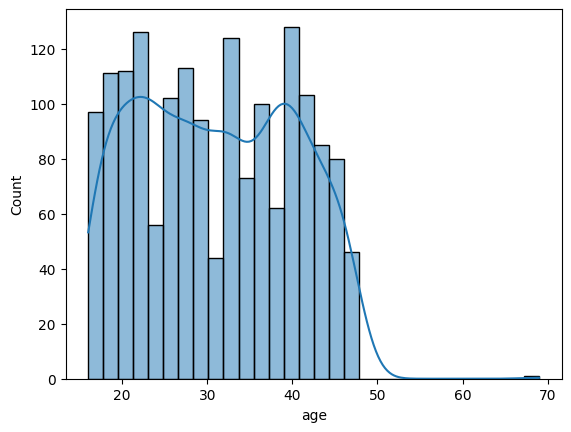

In [189]:
sns.histplot(data=df, x="age", kde=True,fill = True,bins=30)

In [190]:
df['gender'].value_counts()

Male      864
Female    793
Name: gender, dtype: int64

**##Outlier Handeling Using Z_Score**

In [191]:
std = df.age.std()
std

9.105525932588694

In [192]:
df['Zscore'] = (df.age - df.age.mean())/std

In [193]:
df.head()

,age,gender,sleep_after_light,awakenings,awakening_earlier,sleep_duration,sleep_quality,wellbeing_day,day_activity,sleepiness,...,alcohol,tea_coffee,physical_activity_level,extracurricular_activities,video_games,mobile_before_sleep,study_work_pressure,dieseas,medication,Zscore
0,25,Male,1: Slightly delayed,0: No problem,0: Not earlier,0: Sufficient,0: Satisfactory,0: Normal,0: Normal,1: Mild,...,No,No,Active,No,No,Yes,Moderate,No,No,-0.663646
1,23,Male,0: No problem,1: Minor problem,1: A little earlier,0: Sufficient,0: Satisfactory,0: Normal,0: Normal,1: Mild,...,No,Yes,Active,Yes,No,Yes,Moderate,No,No,-0.883293
2,24,Male,1: Slightly delayed,0: No problem,0: Not earlier,0: Sufficient,0: Satisfactory,0: Normal,0: Normal,0: None,...,No,Yes,Somewhat active,No,Yes,Yes,Mild,No,No,-0.773470
3,23,Male,1: Slightly delayed,1: Minor problem,0: Not earlier,2: Markedly insufficient,1: Slightly unsatisfactory,2: Markedly decreased,3: Very decreased,1: Mild,...,No,Yes,Somewhat active,No,No,Yes,Moderate,Yes,No,-0.883293
4,23,Male,3: Very delayed or did not sleep at all,3: Serious problem or did not sleep at all,2: Markedly earlier,2: Markedly insufficient,2: Markedly unsatisfactory,1: Slightly decreased,1: Slightly decreased,2: Considerable,...,No,Yes,Somewhat active,No,No,Yes,Moderate,Yes,No,-0.883293


In [194]:
df[df['Zscore']>2.0]

,age,gender,sleep_after_light,awakenings,awakening_earlier,sleep_duration,sleep_quality,wellbeing_day,day_activity,sleepiness,...,alcohol,tea_coffee,physical_activity_level,extracurricular_activities,video_games,mobile_before_sleep,study_work_pressure,dieseas,medication,Zscore
58,69,Male,1: Slightly delayed,3: Serious problem or did not sleep at all,2: Markedly earlier,1: Slightly insufficient,2: Markedly unsatisfactory,1: Slightly decreased,0: Normal,2: Considerable,...,No,No,Inactive,No,No,Yes,No pressure,No,Yes,4.168584


In [195]:
df=df[(df.Zscore <2.0)]

In [196]:
df

,age,gender,sleep_after_light,awakenings,awakening_earlier,sleep_duration,sleep_quality,wellbeing_day,day_activity,sleepiness,...,alcohol,tea_coffee,physical_activity_level,extracurricular_activities,video_games,mobile_before_sleep,study_work_pressure,dieseas,medication,Zscore
0,25,Male,1: Slightly delayed,0: No problem,0: Not earlier,0: Sufficient,0: Satisfactory,0: Normal,0: Normal,1: Mild,...,No,No,Active,No,No,Yes,Moderate,No,No,-0.663646
1,23,Male,0: No problem,1: Minor problem,1: A little earlier,0: Sufficient,0: Satisfactory,0: Normal,0: Normal,1: Mild,...,No,Yes,Active,Yes,No,Yes,Moderate,No,No,-0.883293
2,24,Male,1: Slightly delayed,0: No problem,0: Not earlier,0: Sufficient,0: Satisfactory,0: Normal,0: Normal,0: None,...,No,Yes,Somewhat active,No,Yes,Yes,Mild,No,No,-0.773470
3,23,Male,1: Slightly delayed,1: Minor problem,0: Not earlier,2: Markedly insufficient,1: Slightly unsatisfactory,2: Markedly decreased,3: Very decreased,1: Mild,...,No,Yes,Somewhat active,No,No,Yes,Moderate,Yes,No,-0.883293
4,23,Male,3: Very delayed or did not sleep at all,3: Serious problem or did not sleep at all,2: Markedly earlier,2: Markedly insufficient,2: Markedly unsatisfactory,1: Slightly decreased,1: Slightly decreased,2: Considerable,...,No,Yes,Somewhat active,No,No,Yes,Moderate,Yes,No,-0.883293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,17,Male,1: Slightly delayed,0: No problem,1: A little earlier,1: Slightly insufficient,0: Satisfactory,0: Normal,0: Normal,0: None,...,No,Yes,Inactive,Yes,Yes,Yes,Severe,Yes,No,-1.542234
1653,29,Male,1: Slightly delayed,0: No problem,1: A little earlier,1: Slightly insufficient,0: Satisfactory,0: Normal,0: Normal,0: None,...,No,Yes,Somewhat active,No,No,Yes,Moderate,Yes,Yes,-0.224353
1654,16,Male,0: No problem,0: No problem,0: Not earlier,0: Sufficient,1: Slightly unsatisfactory,1: Slightly decreased,1: Slightly decreased,0: None,...,Yes,Yes,Inactive,No,No,Yes,Mild,Yes,Yes,-1.652057
1655,29,Female,0: No problem,0: No problem,1: A little earlier,0: Sufficient,1: Slightly unsatisfactory,1: Slightly decreased,0: Normal,0: None,...,Yes,No,Active,No,No,Yes,Severe,No,No,-0.224353


<Axes: xlabel='age', ylabel='Count'>

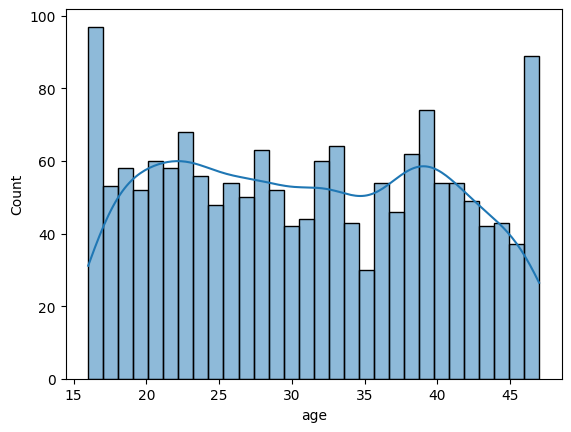

In [197]:
sns.histplot(data=df, x="age", kde=True,fill = True,bins=30)

##**Label Encoding**

In [198]:
#nap_in_day_LabelEncoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[['nap_in_day']]=df[['nap_in_day']].apply(LabelEncoder().fit_transform)

In [199]:
#gender_LabelEncoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[['gender']]=df[['gender']].apply(LabelEncoder().fit_transform)

In [200]:
#pressure_stress_anxiety_LabelEncoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[['pressure_stress_anxiety']]=df[['pressure_stress_anxiety']].apply(LabelEncoder().fit_transform)

In [201]:
#depression_LabelEncoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[['depression']]=df[['depression']].apply(LabelEncoder().fit_transform)

In [202]:
#relationship_problems_LabelEncoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[['relationship_problems']]=df[['relationship_problems']].apply(LabelEncoder().fit_transform)

In [203]:
#smoke_LabelEncoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[['smoke']]=df[['smoke']].apply(LabelEncoder().fit_transform)

In [204]:
#alcohol_LabelEncoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[['alcohol']]=df[['alcohol']].apply(LabelEncoder().fit_transform)

In [205]:
#tea_coffee_LabelEncoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[['tea_coffee']]=df[['tea_coffee']].apply(LabelEncoder().fit_transform)

In [206]:
#video_games_LabelEncoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[['video_games']]=df[['video_games']].apply(LabelEncoder().fit_transform)

In [207]:
#mobile_before_sleep_LabelEncoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[['alcohol']]=df[['alcohol']].apply(LabelEncoder().fit_transform)

In [208]:
#dieseas_LabelEncoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[['dieseas']]=df[['dieseas']].apply(LabelEncoder().fit_transform)

In [209]:
#extracurricular_activities_LabelEncoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[['extracurricular_activities']]=df[['extracurricular_activities']].apply(LabelEncoder().fit_transform)

In [210]:
#medication_LabelEncoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[['medication']]=df[['medication']].apply(LabelEncoder().fit_transform)

In [211]:
#mobile_before_sleep_LabelEncoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[['mobile_before_sleep']]=df[['mobile_before_sleep']].apply(LabelEncoder().fit_transform)

##Ordinal Encoder

In [212]:
df['sleep_after_light'].unique()

array(['1: Slightly delayed', '0: No problem',
       '3: Very delayed or did not sleep at all', '2: Markedly delayed'],
      dtype=object)

In [213]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['0: No problem','1: Slightly delayed','2: Markedly delayed','3: Very delayed or did not sleep at all']])
df[['sleep_after_light']]= oe.fit_transform(df[['sleep_after_light']])

In [214]:
df['awakenings'].unique()

array(['0: No problem', '1: Minor problem',
       '3: Serious problem or did not sleep at all',
       '2: Considerable problem'], dtype=object)

In [215]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['0: No problem','1: Minor problem','2: Considerable problem','3: Serious problem or did not sleep at all']])
df[['awakenings']]= oe.fit_transform(df[['awakenings']])

In [216]:
df['awakening_earlier'].unique()

array(['0: Not earlier', '1: A little earlier', '2: Markedly earlier',
       '3: Much earlier or did not sleep at all'], dtype=object)

In [217]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['0: Not earlier','1: A little earlier','2: Markedly earlier','3: Much earlier or did not sleep at all']])
df[['awakening_earlier']]= oe.fit_transform(df[['awakening_earlier']])

In [218]:
df['sleep_duration'].unique()

array(['0: Sufficient', '2: Markedly insufficient',
       '1: Slightly insufficient',
       '3: Very insufficient or did not sleep at all'], dtype=object)

In [219]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['0: Sufficient','1: Slightly insufficient','2: Markedly insufficient','3: Very insufficient or did not sleep at all']])
df[['sleep_duration']]= oe.fit_transform(df[['sleep_duration']])

In [220]:
df['sleep_quality'].unique()

array(['0: Satisfactory', '1: Slightly unsatisfactory',
       '2: Markedly unsatisfactory',
       '3: Very unsatisfactory or did not sleep at all'], dtype=object)

In [221]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['0: Satisfactory','1: Slightly unsatisfactory','2: Markedly unsatisfactory','3: Very unsatisfactory or did not sleep at all']])
df[['sleep_quality']]= oe.fit_transform(df[['sleep_quality']])

In [222]:
df['wellbeing_day'].unique()

array(['0: Normal', '2: Markedly decreased', '1: Slightly decreased',
       '3: Very decreased'], dtype=object)

In [223]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['0: Normal','1: Slightly decreased','2: Markedly decreased','3: Very decreased']])
df[['wellbeing_day']]= oe.fit_transform(df[['wellbeing_day']])

In [224]:
df['day_activity'].unique()

array(['0: Normal', '3: Very decreased', '1: Slightly decreased',
       '2: Markedly decreased'], dtype=object)

In [225]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['0: Normal','1: Slightly decreased','2: Markedly decreased','3: Very decreased']])
df[['day_activity']]= oe.fit_transform(df[['day_activity']])

In [226]:
df['sleepiness'].unique()

array(['1: Mild', '0: None', '2: Considerable', '3: Intense'],
      dtype=object)

In [227]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['0: None','1: Mild','2: Considerable','3: Intense']])
df[['sleepiness']]= oe.fit_transform(df[['sleepiness']])

In [228]:
df['relationship'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [229]:
df['duration_night_sleep'].unique()

array(['More than 8 hours', '6-8 hours', '4-6 hours', 'Less than 4 hours'],
      dtype=object)

In [230]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['Less than 4 hours','4-6 hours','6-8 hours','More than 8 hours']])
df[['duration_night_sleep']]= oe.fit_transform(df[['duration_night_sleep']])

In [231]:
df['physical_activity_level'].unique()

array(['Active', 'Somewhat active', 'Inactive', 'Very Active'],
      dtype=object)

In [232]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['Inactive','Somewhat active','Active','Very Active']])
df[['physical_activity_level']]= oe.fit_transform(df[['physical_activity_level']])

In [233]:
df['study_work_pressure'].unique()

array(['Moderate', 'Mild', 'No pressure', 'Severe'], dtype=object)

In [234]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['No pressure','Mild','Moderate','Severe']])
df[['study_work_pressure']]= oe.fit_transform(df[['study_work_pressure']])

In [235]:
#without using any kind of encoding
df.replace({'relationship':{'Single':0,'Married':1,'Divorced':2}},inplace= True)

In [236]:
df.drop(columns=['Zscore'],inplace=True)

##Calculating AIS Score to Find Out Insomnia (insomnia>=6)

In [237]:
column_names = ['sleep_after_light', 'awakenings', 'awakening_earlier', 'sleep_duration','sleep_quality','wellbeing_day','day_activity','sleepiness']
df['ais_score']= df[column_names].sum(axis=1)

In [238]:
insomnia=[]
for row in df['ais_score']:
   if row < 6.0 :    insomnia.append('No')
   else:insomnia.append('Yes')

In [239]:
df['insomnia']=insomnia

In [240]:
print(df['insomnia'].value_counts()) # This is what you will use

Yes    997
No     659
Name: insomnia, dtype: int64


<Axes: xlabel='insomnia', ylabel='count'>

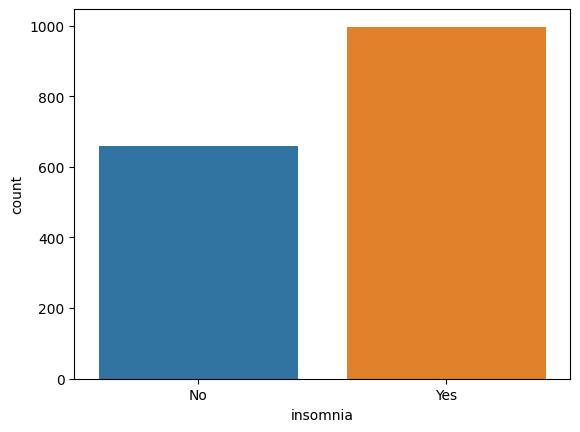

In [241]:
import seaborn as sns
sns.countplot(x='insomnia', data=df)

In [242]:
df

,age,gender,sleep_after_light,awakenings,awakening_earlier,sleep_duration,sleep_quality,wellbeing_day,day_activity,sleepiness,...,tea_coffee,physical_activity_level,extracurricular_activities,video_games,mobile_before_sleep,study_work_pressure,dieseas,medication,ais_score,insomnia
0,25,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,2.0,0,0,1,2.0,0,0,2.0,No
1,23,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,2.0,1,0,1,2.0,0,0,3.0,No
2,24,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1.0,0,1,1,1.0,0,0,1.0,No
3,23,1,1.0,1.0,0.0,2.0,1.0,2.0,3.0,1.0,...,1,1.0,0,0,1,2.0,1,0,11.0,Yes
4,23,1,3.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,...,1,1.0,0,0,1,2.0,1,0,16.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,17,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1,0.0,1,1,1,3.0,1,0,3.0,No
1653,29,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1,1.0,0,0,1,2.0,1,1,3.0,No
1654,16,1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1,0.0,0,0,1,1.0,1,1,3.0,No
1655,29,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,2.0,0,0,1,3.0,0,0,3.0,No


In [243]:
#insomnia_LabelEncoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[['insomnia']]=df[['insomnia']].apply(LabelEncoder().fit_transform)

In [244]:
df

,age,gender,sleep_after_light,awakenings,awakening_earlier,sleep_duration,sleep_quality,wellbeing_day,day_activity,sleepiness,...,tea_coffee,physical_activity_level,extracurricular_activities,video_games,mobile_before_sleep,study_work_pressure,dieseas,medication,ais_score,insomnia
0,25,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,2.0,0,0,1,2.0,0,0,2.0,0
1,23,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,2.0,1,0,1,2.0,0,0,3.0,0
2,24,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1.0,0,1,1,1.0,0,0,1.0,0
3,23,1,1.0,1.0,0.0,2.0,1.0,2.0,3.0,1.0,...,1,1.0,0,0,1,2.0,1,0,11.0,1
4,23,1,3.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,...,1,1.0,0,0,1,2.0,1,0,16.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,17,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1,0.0,1,1,1,3.0,1,0,3.0,0
1653,29,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1,1.0,0,0,1,2.0,1,1,3.0,0
1654,16,1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1,0.0,0,0,1,1.0,1,1,3.0,0
1655,29,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,2.0,0,0,1,3.0,0,0,3.0,0


In [245]:
df.drop(columns=['ais_score'],inplace=True)

In [246]:
df

,age,gender,sleep_after_light,awakenings,awakening_earlier,sleep_duration,sleep_quality,wellbeing_day,day_activity,sleepiness,...,alcohol,tea_coffee,physical_activity_level,extracurricular_activities,video_games,mobile_before_sleep,study_work_pressure,dieseas,medication,insomnia
0,25,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,2.0,0,0,1,2.0,0,0,0
1,23,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,1,2.0,1,0,1,2.0,0,0,0
2,24,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1.0,0,1,1,1.0,0,0,0
3,23,1,1.0,1.0,0.0,2.0,1.0,2.0,3.0,1.0,...,0,1,1.0,0,0,1,2.0,1,0,1
4,23,1,3.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,...,0,1,1.0,0,0,1,2.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,17,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0.0,1,1,1,3.0,1,0,0
1653,29,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,1,1.0,0,0,1,2.0,1,1,0
1654,16,1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1,1,0.0,0,0,1,1.0,1,1,0
1655,29,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,0,2.0,0,0,1,3.0,0,0,0


In [247]:
X = df.drop(columns=['insomnia'],axis=1)
Y = df['insomnia']

In [249]:
X

,age,gender,sleep_after_light,awakenings,awakening_earlier,sleep_duration,sleep_quality,wellbeing_day,day_activity,sleepiness,...,smoke,alcohol,tea_coffee,physical_activity_level,extracurricular_activities,video_games,mobile_before_sleep,study_work_pressure,dieseas,medication
0,25,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,2.0,0,0,1,2.0,0,0
1,23,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,2.0,1,0,1,2.0,0,0
2,24,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1.0,0,1,1,1.0,0,0
3,23,1,1.0,1.0,0.0,2.0,1.0,2.0,3.0,1.0,...,0,0,1,1.0,0,0,1,2.0,1,0
4,23,1,3.0,3.0,2.0,2.0,2.0,1.0,1.0,2.0,...,0,0,1,1.0,0,0,1,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,17,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0.0,1,1,1,3.0,1,0
1653,29,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,1.0,0,0,1,2.0,1,1
1654,16,1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1,1,1,0.0,0,0,1,1.0,1,1
1655,29,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,1,0,2.0,0,0,1,3.0,0,0


In [250]:
Y

0       0
1       0
2       0
3       1
4       1
       ..
1652    0
1653    0
1654    0
1655    0
1656    0
Name: insomnia, Length: 1656, dtype: int64

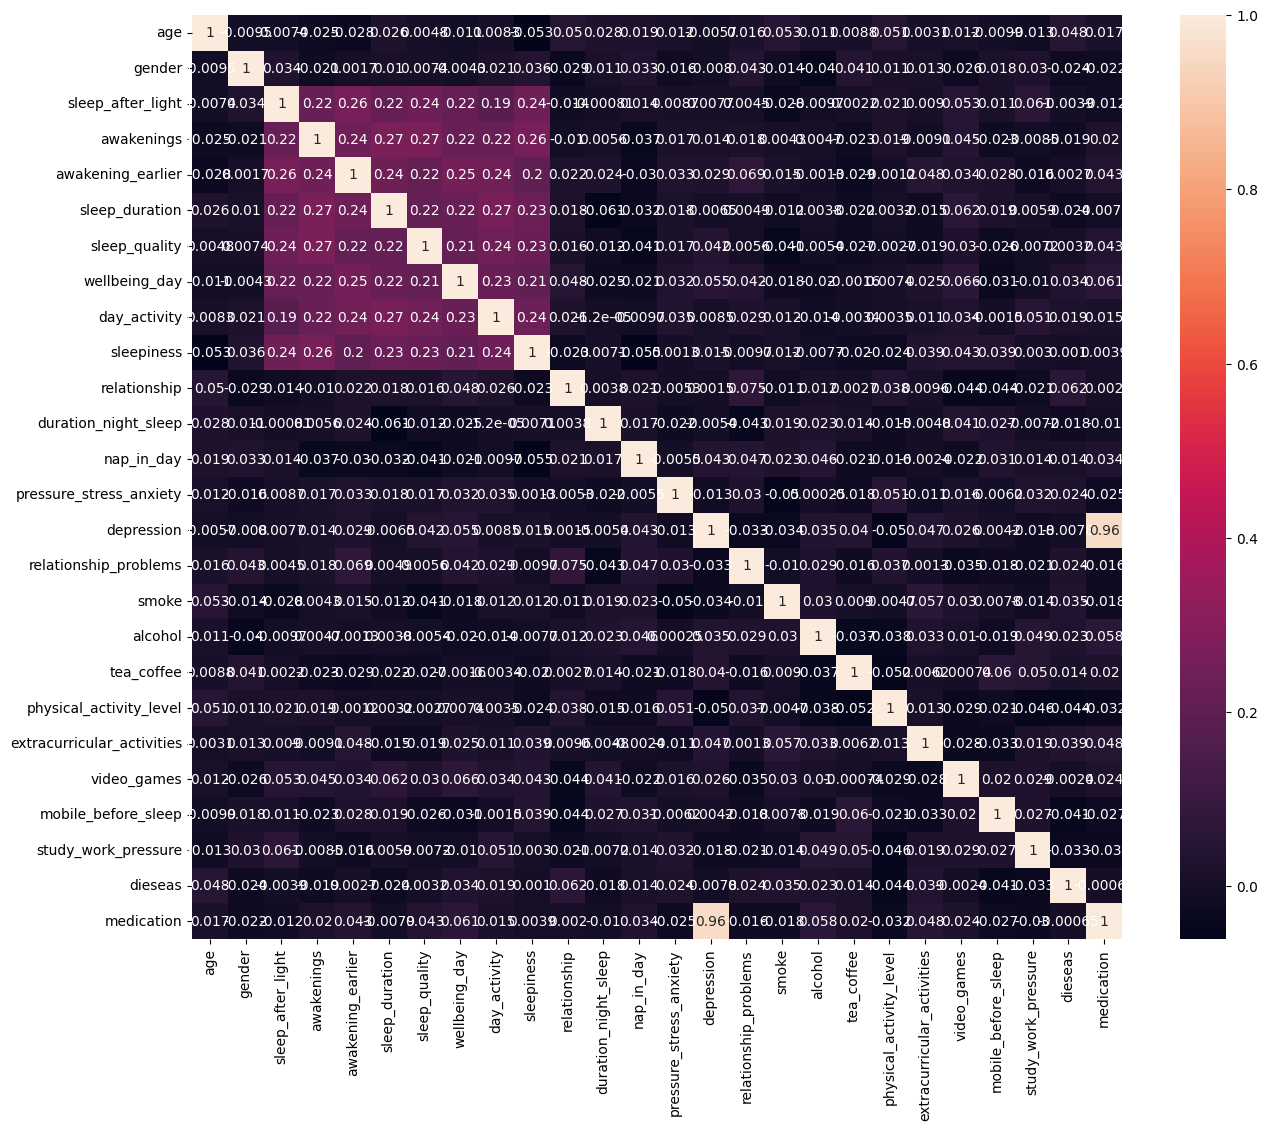

In [251]:
plt.figure(figsize = (15,12))
dataplot = sns.heatmap(X.corr(), annot=True)
plt.show()

##Spliting Dataset

In [252]:
from sklearn.model_selection import train_test_split

In [255]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=102)

**Standerd Scaler

In [256]:
from sklearn.preprocessing import StandardScaler

In [259]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)


**Decision Tree

In [279]:
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier()
Dtree.fit(xtrain,ytrain)
predictions = Dtree.predict(xtest)
print(confusion_matrix(ytest,predictions))
print('\n')
print(classification_report(ytest,predictions))

[[169  17]
 [ 23 288]]


              precision    recall  f1-score   support

           0       0.88      0.91      0.89       186
           1       0.94      0.93      0.94       311

    accuracy                           0.92       497
   macro avg       0.91      0.92      0.91       497
weighted avg       0.92      0.92      0.92       497



**Random Forest

In [273]:
from sklearn.ensemble import RandomForestClassifier

In [274]:
rfc = RandomForestClassifier(n_estimators=300)

In [275]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=300)

In [276]:
predictions2 = rfc.predict(xtest)

In [277]:
print(confusion_matrix(ytest,predictions2))
print('\n')
print(classification_report(ytest,predictions2))

[[184   2]
 [ 27 284]]


              precision    recall  f1-score   support

           0       0.87      0.99      0.93       186
           1       0.99      0.91      0.95       311

    accuracy                           0.94       497
   macro avg       0.93      0.95      0.94       497
weighted avg       0.95      0.94      0.94       497



**KNN

In [278]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
predict = knn.predict(xtest)
print(confusion_matrix(ytest,predict))
print(classification_report(ytest,predict))

[[178   8]
 [ 66 245]]
              precision    recall  f1-score   support

           0       0.73      0.96      0.83       186
           1       0.97      0.79      0.87       311

    accuracy                           0.85       497
   macro avg       0.85      0.87      0.85       497
weighted avg       0.88      0.85      0.85       497



##Choosing K-Value

In [281]:
#Choosing_K-Value
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    predict_i=knn.predict(xtest)
    error_rate.append(np.mean(predict_i != ytest))

Text(0, 0.5, 'Error Rate')

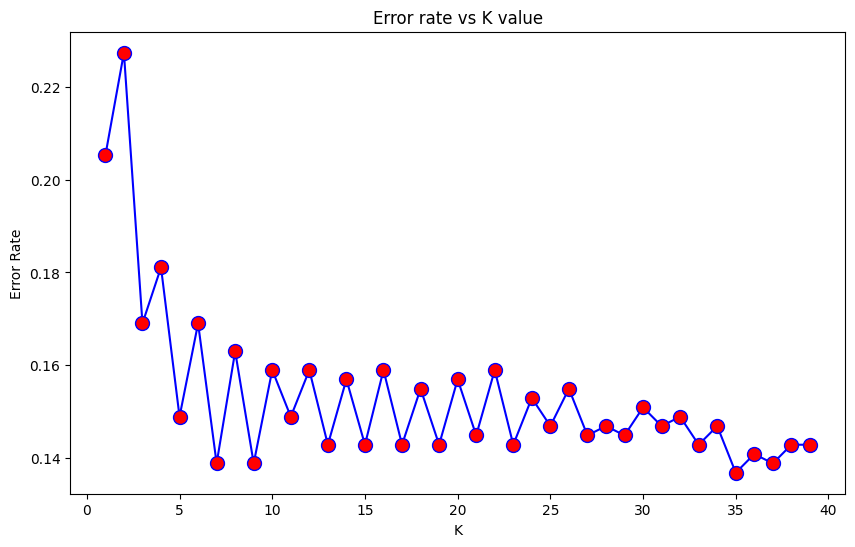

In [282]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue' ,marker='o',
         markerfacecolor ='red',markersize=10)
plt.title("Error rate vs K value")
plt.xlabel('K')
plt.ylabel('Error Rate')

In [291]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=35)
knn.fit(xtrain,ytrain)
predict = knn.predict(xtest)

print(confusion_matrix(ytest,predict))
print(classification_report(ytest,predict))


[[186   0]
 [ 68 243]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       186
           1       1.00      0.78      0.88       311

    accuracy                           0.86       497
   macro avg       0.87      0.89      0.86       497
weighted avg       0.90      0.86      0.87       497



##Ensemble Techniques
##AdaBoost

In [286]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Create a base Decision Tree Classifier (you can customize this classifier)
base_classifier = DecisionTreeClassifier(max_depth=3)
# Create an AdaBoost Classifier using the base classifier
clf = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)
# Train the classifier on the training data
clf.fit(xtrain, ytrain)
y_pred = clf.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
report = classification_report(ytest, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9617706237424547
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       186
           1       1.00      0.94      0.97       311

    accuracy                           0.96       497
   macro avg       0.95      0.97      0.96       497
weighted avg       0.96      0.96      0.96       497



##Voting Classifier

In [287]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report

Accuracy:[0.9899396378269618]
ROC AUC:[0.9869109947643979]
Recall:[1.0]
Precision:[0.9839228295819936]
F1-Score:[0.9918962722852513]
Classification_Report
-----------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       186
           1       1.00      0.98      0.99       311

    accuracy                           0.99       497
   macro avg       0.99      0.99      0.99       497
weighted avg       0.99      0.99      0.99       497

Confusion_Matrix
----------------------


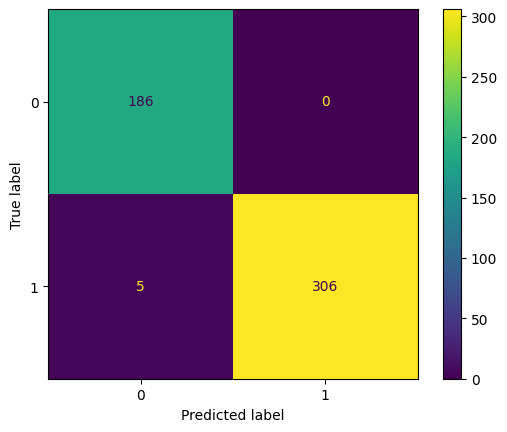

In [288]:
# Create the list to store the result
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_roc_scores = []

# Create a Model
gbc= GradientBoostingClassifier(max_features=11, min_samples_split=5)
gbc1= GradientBoostingClassifier(max_features=11, min_samples_split=5)
rf=RandomForestClassifier(max_features=11, min_samples_leaf=10, n_estimators=300)
lr= LogisticRegression(penalty='l1' , solver='liblinear')


voting_clf= VotingClassifier(estimators=[('gradient_boosting', gbc),('gradient_boosting1', gbc1),('random_forest',rf),('logistic_regression',lr)], voting='soft', n_jobs=-1)
voting_clf.fit(xtrain, ytrain)
y_pred= voting_clf.predict(xtest)
accuracy_scores.append(accuracy_score(y_pred, ytest))
precision_scores.append(precision_score(y_pred, ytest))
recall_scores.append(recall_score(y_pred, ytest))
f1_scores.append(f1_score(y_pred, ytest))
auc_roc_scores.append(roc_auc_score(y_pred, ytest))


# Print the Results
print(f"Accuracy:{accuracy_scores}")
print(f"ROC AUC:{auc_roc_scores}")
print(f"Recall:{recall_scores}")
print(f"Precision:{precision_scores}")
print(f"F1-Score:{f1_scores}")
print("Classification_Report")
print("-----------------------")
print(classification_report(ytest,y_pred))
print("Confusion_Matrix")
print("----------------------")
ConfusionMatrixDisplay.from_predictions(ytest, y_pred)
plt.show()